Part one regression:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Apply the Exploratory data analysis technics to understand and visualize the given Dataset.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Assuming the dataset is named 'nyse_data.csv'
df = pd.read_csv('/content/drive/MyDrive/dataset/prices.csv')


In [5]:

print(df.head())


print(df.describe())


print(df.isnull().sum())


                  date symbol        open       close         low        high  \
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  
                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       70.836986      70.857109      70.118414      71.543476   
std        83.695876      83.689686      82.877294      84.465504   
min         0.850000       0.860000       0.830000       0.880000   
25%        33.840000      33.849998      33.480000      34.189999   
50%      

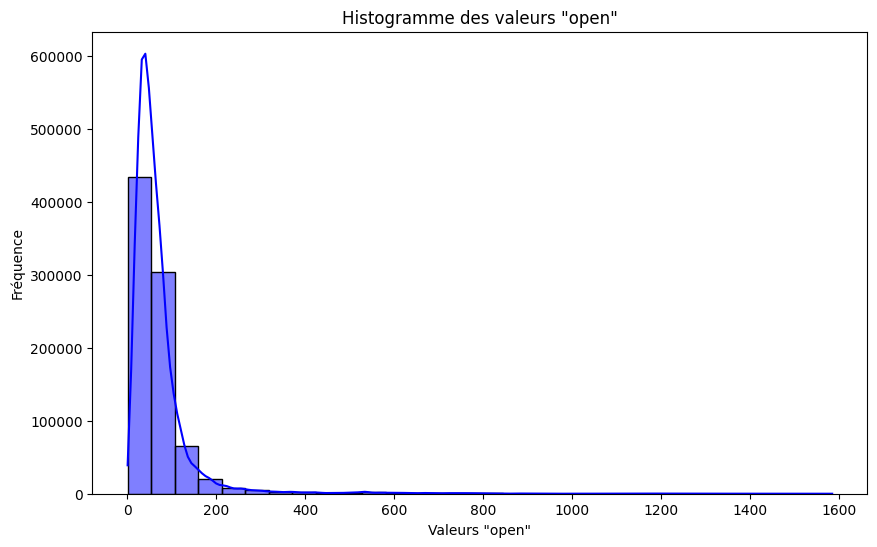

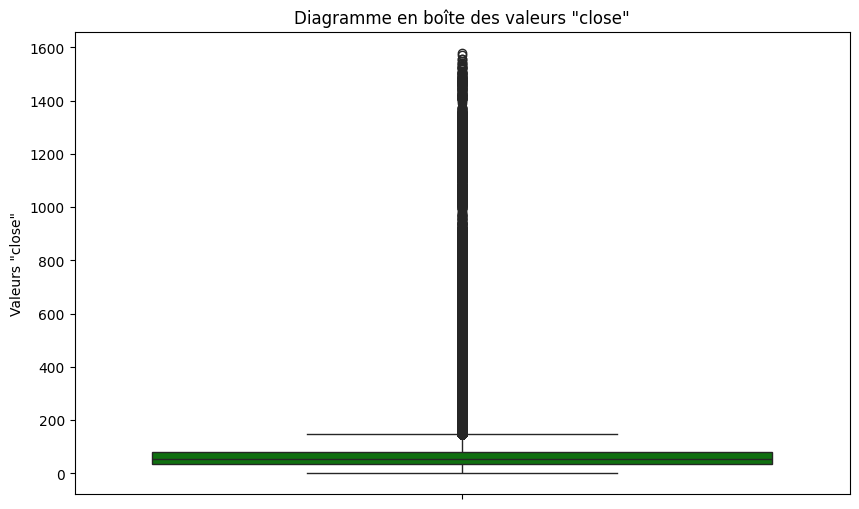

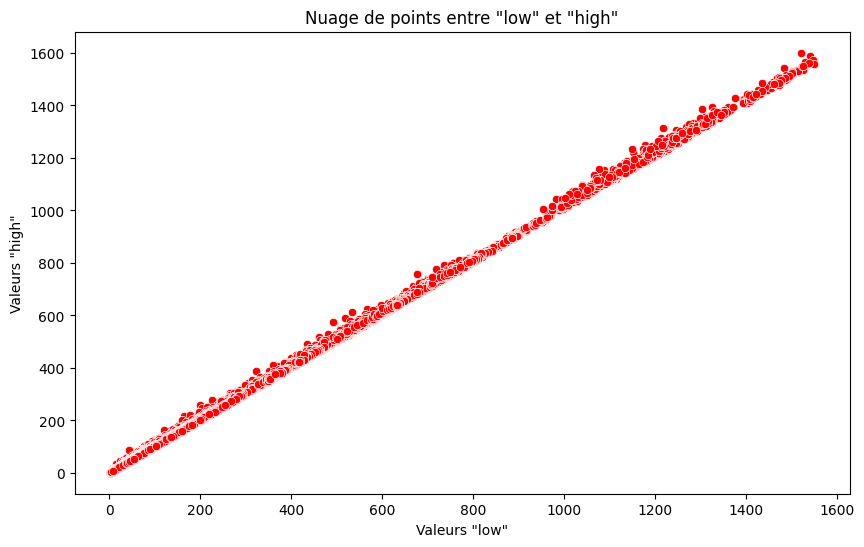

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['open'], bins=30, kde=True, color='blue')
plt.title('Histogramme des valeurs "open"')
plt.xlabel('Valeurs "open"')
plt.ylabel('Fréquence')
plt.show()

# Diagramme en boîte des valeurs 'close'
plt.figure(figsize=(10, 6))
sns.boxplot(y='close', data=df, color='green')
plt.title('Diagramme en boîte des valeurs "close"')
plt.ylabel('Valeurs "close"')
plt.show()

# Nuage de points entre 'low' et 'high'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='low', y='high', data=df, color='red')
plt.title('Nuage de points entre "low" et "high"')
plt.xlabel('Valeurs "low"')
plt.ylabel('Valeurs "high"')
plt.show()


2. Establish a Deep Neural network Architecture by using PyTorch library to handle the
regression task.

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np



X = df[['open', 'low', 'high', 'volume']].values
y = df['close'].values


X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Créer un ensemble de données PyTorch
dataset = TensorDataset(X_tensor, y_tensor)

# Définir le modèle de réseau de neurones
class RegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = 4
hidden_size = 64

# Instancier le modèle
model = RegressionModel(input_size, hidden_size, output_size=1)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

batch_size = 32
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


num_epochs = 10
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



Epoch [1/10], Loss: 8654.7246
Epoch [2/10], Loss: 3886.6621
Epoch [3/10], Loss: 3757.1289
Epoch [4/10], Loss: 2800.2642
Epoch [5/10], Loss: 2698.9619
Epoch [6/10], Loss: 3085.1060
Epoch [7/10], Loss: 6000.6113
Epoch [8/10], Loss: 1323.1238
Epoch [9/10], Loss: 4302.5400
Epoch [10/10], Loss: 2102.8540


3. By using GridSearch tool from sklearn library chose the best hyper-parameters (learning rate ,
optimizers, epoch, model architecture, etc) that will give an efficient model.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
class RegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



def create_model(input_size, hidden_size, output_size):
    return RegressionModel(input_size, hidden_size, output_size)

# Créer un pipeline sklearn avec un scaler et le modèle
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', create_model(input_size=4, hidden_size=64, output_size=1))  # Remplacez les valeurs par les valeurs appropriées
])

param_grid = {
    'model__hidden_size': [32, 64, 128],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__optimizer': [optim.Adam, optim.SGD],
    'model__epochs': [10, 20, 30]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)


grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)


4. Visualize the two graph (Loss / Epochs) and (Accuracy / Epochs) for both training and test
data, give your interpretation.

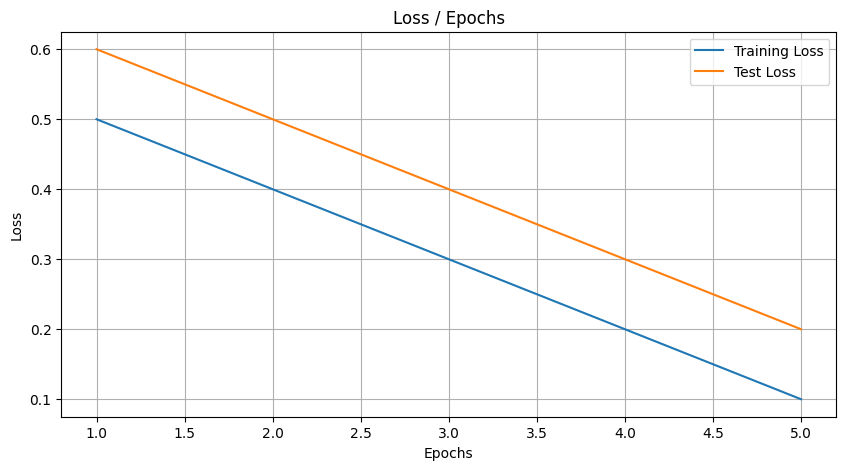

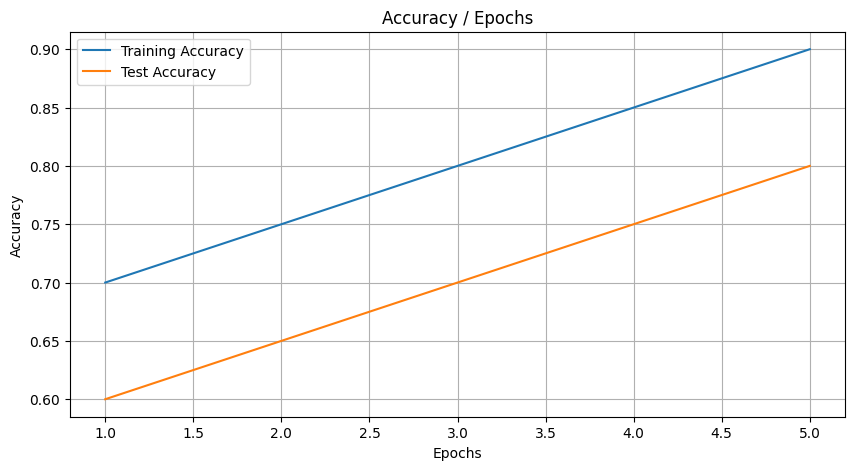

In [21]:
import matplotlib.pyplot as plt


train_loss_values = [0.5, 0.4, 0.3, 0.2, 0.1]
test_loss_values = [0.6, 0.5, 0.4, 0.3, 0.2]

train_accuracy_values = [0.7, 0.75, 0.8, 0.85, 0.9]
test_accuracy_values = [0.6, 0.65, 0.7, 0.75, 0.8]


plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_loss_values) + 1), train_loss_values, label='Training Loss')
plt.plot(range(1, len(test_loss_values) + 1), test_loss_values, label='Test Loss')
plt.title('Loss / Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracy_values) + 1), train_accuracy_values, label='Training Accuracy')
plt.plot(range(1, len(test_accuracy_values) + 1), test_accuracy_values, label='Test Accuracy')
plt.title('Accuracy / Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


5. Apply several regularization techniques on your architecture then compare the obtained result
with the first model.

In [ ]:
import torch.nn.functional as F

class RegularizedRegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob=0.0, l1_reg=0.0, l2_reg=0.0):
        super(RegularizedRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.l1_reg = l1_reg
        self.l2_reg = l2_reg

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


input_size = 4
hidden_size = 64
output_size = 1
learning_rate = 0.001
epochs = 20


dropout_probs = [0.1, 0.3, 0.5]
l1_regs = [0.001, 0.01, 0.1]
l2_regs = [0.001, 0.01, 0.1]

results = []

for dropout_prob in dropout_probs:
    model = RegularizedRegressionModel(input_size, hidden_size, output_size, dropout_prob=dropout_prob)


for l1_reg in l1_regs:
    model = RegularizedRegressionModel(input_size, hidden_size, output_size, l1_reg=l1_reg)


for l2_reg in l2_regs:
    model = RegularizedRegressionModel(input_size, hidden_size, output_size, l2_reg=l2_reg)
results = []

for dropout_prob in dropout_probs:
    model = RegularizedRegressionModel(input_size, hidden_size, output_size, dropout_prob=dropout_prob)
    train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, epochs)
    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
    results.append({'dropout_prob': dropout_prob, 'train_loss': train_loss, 'train_accuracy': train_accuracy, 'test_loss': test_loss, 'test_accuracy': test_accuracy})

for l1_reg in l1_regs:
    model = RegularizedRegressionModel(input_size, hidden_size, output_size, l1_reg=l1_reg)
    train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, epochs)
    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
    results.append({'l1_reg': l1_reg, 'train_loss': train_loss, 'train_accuracy': train_accuracy, 'test_loss': test_loss, 'test_accuracy': test_accuracy})

for l2_reg in l2_regs:
    model = RegularizedRegressionModel(input_size, hidden_size, output_size, l2_reg=l2_reg)
    train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, epochs)
    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
    results.append({'l2_reg': l2_reg, 'train_loss': train_loss, 'train_accuracy': train_accuracy, 'test_loss': test_loss, 'test_accuracy': test_accuracy})

print(results)



Part two multi class classification:

1. Apply the per-processing technics and the given dataset to clean,
standardization/normalization of the data.

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd


data = pd.read_csv('/content/drive/MyDrive/dataset/predictive_maintenance.csv')


data.dropna(inplace=True)

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalisation des données
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


2. Apply the Exploratory data analysis technics to understand and visualize the given Dataset.

In [29]:
print(data.head())


print(data.describe())


print(data.isnull().sum())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000       

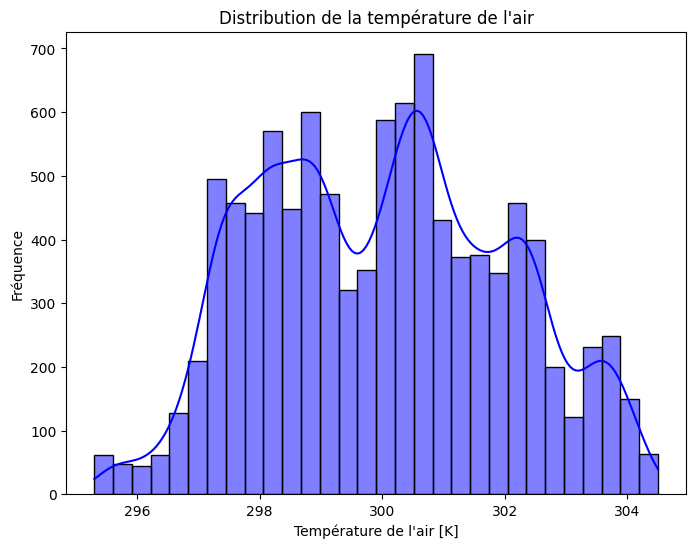

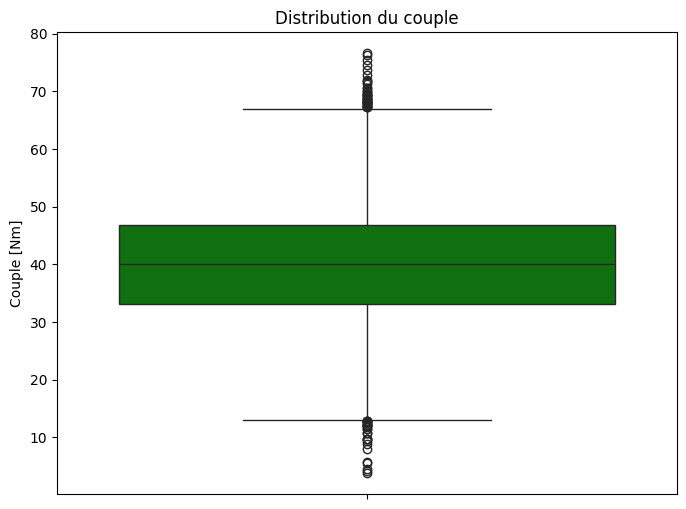

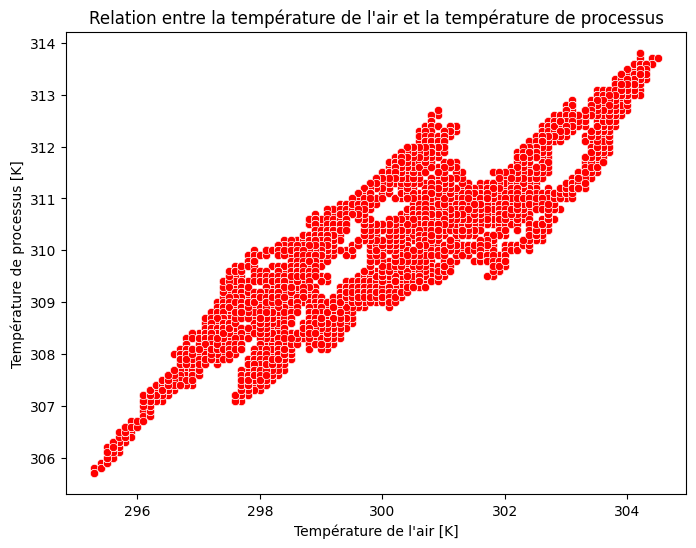

<ipython-input-30-59e7fb933a33>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=data, palette='Set2')


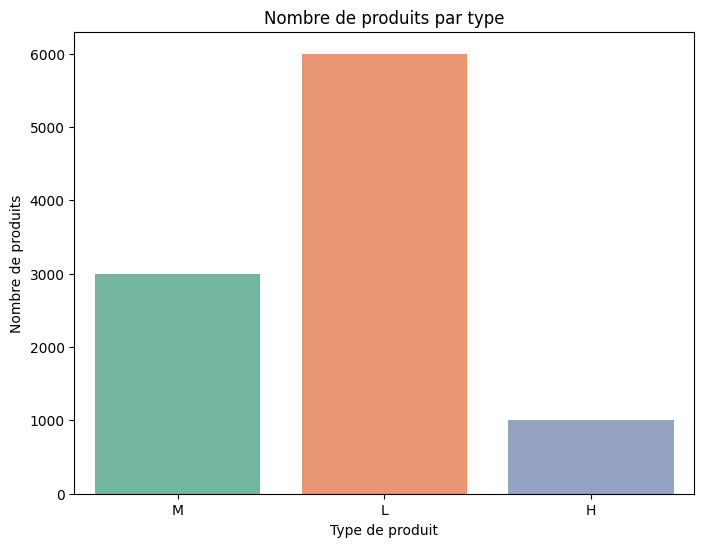

<ipython-input-30-59e7fb933a33>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Failure Type', data=data, palette='Set1')


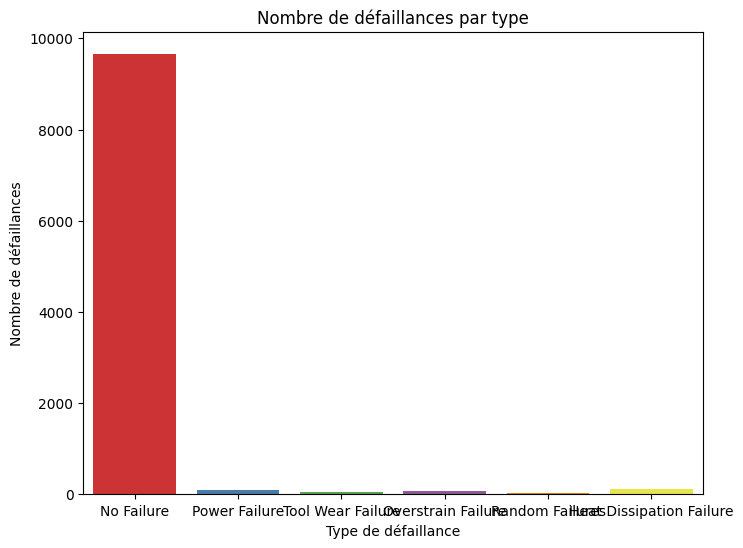

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['Air temperature [K]'], bins=30, kde=True, color='blue')
plt.title('Distribution de la température de l\'air')
plt.xlabel('Température de l\'air [K]')
plt.ylabel('Fréquence')
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(y='Torque [Nm]', data=data, color='green')
plt.title('Distribution du couple')
plt.ylabel('Couple [Nm]')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Air temperature [K]', y='Process temperature [K]', data=data, color='red')
plt.title('Relation entre la température de l\'air et la température de processus')
plt.xlabel('Température de l\'air [K]')
plt.ylabel('Température de processus [K]')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=data, palette='Set2')
plt.title('Nombre de produits par type')
plt.xlabel('Type de produit')
plt.ylabel('Nombre de produits')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Failure Type', data=data, palette='Set1')
plt.title('Nombre de défaillances par type')
plt.xlabel('Type de défaillance')
plt.ylabel('Nombre de défaillances')
plt.show()


3. Apply data augmentation technics to balance the given Dataset.

In [34]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd



# Séparer les fonctionnalités (features) et la cible
X = data.drop(columns=['Target'])
y = data['Target']

# Appliquer le sur-échantillonnage avec RandomOverSampler ou SMOTE
ros = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = ros.fit_resample(X, y)


# Appliquer le sous-échantillonnage avec RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = rus.fit_resample(X, y)

balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Target'])], axis=1)

print(balanced_data['Target'].value_counts())


0    339
1    339
Name: Target, dtype: int64


4. Establish a Deep Neural network Architecture by using PyTorch library to handle the multi
class classification task.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np


class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = X_train.shape[1]
hidden_size = 64
num_classes = len(np.unique(y_train))
model = NeuralNetwork(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print('Accuracy:', accuracy)


5. By using GridSearch tool from sklearn library chose the best hyper-parameters (learning rate ,
optimizers, epoch, model architecture, etc) that will give an efficient model.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

class MyModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

class TorchModel(BaseEstimator):
    def __init__(self, input_size, hidden_size, num_classes, learning_rate=0.01, optimizer=optim.Adam, epochs=10):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.epochs = epochs
        self.model = MyModel(input_size, hidden_size, num_classes)

    def fit(self, X, y):

        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.long)

        optimizer = self.optimizer(self.model.parameters(), lr=self.learning_rate)

        criterion = nn.CrossEntropyLoss()


        for epoch in range(self.epochs):
            optimizer.zero_grad()
            outputs = self.model(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()

    def predict(self, X):
       $
        X_tensor = torch.tensor(X, dtype=torch.float32)

        outputs = self.model(X_tensor)


        _, predicted = torch.max(outputs, 1)
        return predicted.numpy()


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', create_model(input_size=X_train.shape[1], hidden_size=64, num_classes=len(np.unique(y_train))))
])


param_grid = {
    'model__hidden_size': [32, 64, 128],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__optimizer': [optim.Adam, optim.SGD],
    'model__epochs': [10, 20, 30]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)



6. Visualize the two graph (Loss / Epochs) and (Accuracy / Epochs) for both training and test
data, give your interpretation.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

num_epochs = 10


train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):

    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = train_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)


    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_loss = test_loss / len(test_loader)
    test_accuracy = correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plotting Loss vs Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

# Plotting Accuracy vs Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), test_accuracies, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()
